## Check Password Strength Using ML algorithms

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data.csv',',',error_bad_lines=False, nrows = 8000)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\n'


In [4]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
data[data['password'].isnull()]

,password,strength


In [6]:
data.dropna(inplace=True)

In [7]:
passwords_tuple=np.array(data)

In [8]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['t2upy1n5yza', 1],
       ['64vcrg1v', 1],
       ['jordanr11', 1]], dtype=object)

In [9]:
import random
random.shuffle(passwords_tuple) #shuffling randomly for robustness


In [10]:
y=[labels[1] for labels in passwords_tuple]

In [11]:
y[0:10]

[1, 1, 1, 1, 1, 2, 2, 1, 1, 1]

In [12]:
X=[labels[0] for labels in passwords_tuple]

In [13]:
X[0:10]

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'v1118714',
 'universe2908']

In [14]:
import seaborn as sns

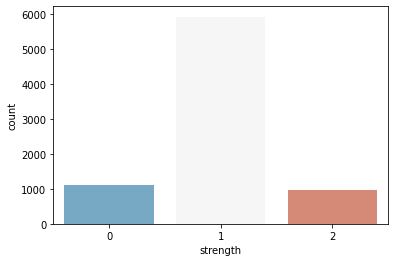

In [15]:
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [16]:
data.shape

(8000, 2)

In [17]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X_tr=vectorizer.fit_transform(X)

In [19]:
X_tr.shape

(8000, 61)

In [20]:
vectorizer.vocabulary_

{'k': 40,
 'z': 55,
 'd': 33,
 'e': 34,
 '5': 18,
 '7': 20,
 'i': 38,
 'n': 43,
 'o': 44,
 '3': 16,
 '4': 17,
 'a': 30,
 'v': 51,
 'y': 54,
 'q': 46,
 '1': 14,
 'l': 41,
 'm': 42,
 'g': 36,
 'f': 35,
 't': 49,
 '2': 15,
 '8': 21,
 'u': 50,
 'r': 47,
 's': 48,
 '9': 22,
 '0': 13,
 'b': 31,
 'h': 37,
 'j': 39,
 '6': 19,
 '-': 10,
 'c': 32,
 '@': 27,
 'w': 52,
 'p': 45,
 'x': 53,
 '.': 11,
 '&': 5,
 '?': 26,
 '>': 25,
 '<': 24,
 '!': 1,
 ';': 23,
 '%': 4,
 '_': 29,
 ' ': 0,
 '$': 3,
 '±': 57,
 '(': 6,
 ')': 7,
 '#': 2,
 '^': 28,
 '*': 8,
 '/': 12,
 'ú': 59,
 'þ': 60,
 'ó': 58,
 '+': 9,
 '~': 56}

In [21]:
X_tr[10]

<1x61 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [22]:
data.iloc[0,0]

'kzde5577'

In [23]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X_tr[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.594626
5,0.565739
z,0.338211
k,0.287773
d,0.285559
...,...
?,0.000000
@,0.000000
^,0.000000
_,0.000000


## Logistics Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.20, random_state=42)  #splitting

In [26]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

y_predict = log_class.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[  26  230    1]
 [  16 1128   10]
 [   2  118   69]]
0.764375
              precision    recall  f1-score   support

           0       0.59      0.10      0.17       257
           1       0.76      0.98      0.86      1154
           2       0.86      0.37      0.51       189

    accuracy                           0.76      1600
   macro avg       0.74      0.48      0.51      1600
weighted avg       0.75      0.76      0.71      1600



In [28]:
## Multinomial logistic classification
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.781875


In [29]:
y_predict_clf = clf.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_predict_clf))
print(accuracy_score(y_test,y_predict_clf))
print(classification_report(y_test,y_predict_clf))

[[  43  214    0]
 [  28 1117    9]
 [   2   96   91]]
0.781875
              precision    recall  f1-score   support

           0       0.59      0.17      0.26       257
           1       0.78      0.97      0.87      1154
           2       0.91      0.48      0.63       189

    accuracy                           0.78      1600
   macro avg       0.76      0.54      0.59      1600
weighted avg       0.77      0.78      0.74      1600



## XGboost Algorithm

In [31]:
import xgboost as xgb

In [32]:
xgb_classsifier = xgb.XGBClassifier()

In [33]:
xgb_classsifier.fit(X_train, y_train)
y_predict_xbg = xgb_classsifier.predict(X_test)

In [34]:
xgb_classsifier.score(X_test, y_test)

0.930625

In [35]:
print(confusion_matrix(y_test,y_predict_xbg))
print(accuracy_score(y_test,y_predict_xbg))
print(classification_report(y_test,y_predict_xbg))

[[ 182   75    0]
 [  21 1128    5]
 [   0   10  179]]
0.930625
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       257
           1       0.93      0.98      0.95      1154
           2       0.97      0.95      0.96       189

    accuracy                           0.93      1600
   macro avg       0.93      0.88      0.90      1600
weighted avg       0.93      0.93      0.93      1600



In [42]:
## Hyper Parameter Optimization
from sklearn.model_selection import RandomizedSearchCV
params_grid={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [43]:
xg_cl=xgb.XGBClassifier()
xg_cl.fit(X_train,y_train)

rf_randomcv=RandomizedSearchCV(estimator=xg_cl,param_distributions=params_grid,n_iter=2,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   26.4s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.3s finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(objective='multi:softprob'),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=100, verbose=2)

In [44]:
rf_randomcv.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12,
              objective='multi:softprob')

In [45]:
rf_randomcv.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

## Multinomial NB

In [46]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_predict_nb = nb_classifier.predict(X_test)

In [47]:
nb_classifier.score(X_test, y_test)

0.725625

In [48]:
print(confusion_matrix(y_test,y_predict_nb))
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

[[   0  256    1]
 [   0 1154    0]
 [   2  180    7]]
0.725625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.73      1.00      0.84      1154
           2       0.88      0.04      0.07       189

    accuracy                           0.73      1600
   macro avg       0.53      0.35      0.30      1600
weighted avg       0.63      0.73      0.62      1600



In [49]:
y_predict_nb.shape

(1600,)

## RandomForest Classification

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
y_predict_rf=rf_classifier.predict(X_test)

In [51]:
print(confusion_matrix(y_test,y_predict_rf))
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

[[ 227   30    0]
 [  17 1132    5]
 [   5   19  165]]
0.9525
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       257
           1       0.96      0.98      0.97      1154
           2       0.97      0.87      0.92       189

    accuracy                           0.95      1600
   macro avg       0.95      0.91      0.93      1600
weighted avg       0.95      0.95      0.95      1600



### Performing HyperParameter Tuning using Random SearchCV on the random forest model

In [52]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [53]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=2,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   10.8s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   43.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [54]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [55]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [56]:
best_random_grid=rf_randomcv.best_estimator_

In [57]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 219   38    0]
 [   6 1147    1]
 [   1   15  173]]
Accuracy Score 0.961875
Classification report:               precision    recall  f1-score   support

           0       0.97      0.85      0.91       257
           1       0.96      0.99      0.97      1154
           2       0.99      0.92      0.95       189

    accuracy                           0.96      1600
   macro avg       0.97      0.92      0.94      1600
weighted avg       0.96      0.96      0.96      1600

